In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, \
                            precision_score, recall_score, f1_score, confusion_matrix, classification_report, \
                            roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
import seaborn as sns

In [2]:
def data_analysis(file_name='boston.csv'):
  data=pd.read_csv(file_name)
  print('data_head\n')
  display(data.head())
  print('data_info\n')
  display(data.info())
  print('data_describe\n')
  display(data.describe())
  print('data_duplicated\n')
  print(data.duplicated().sum())
  print('data_isnull\n')
  null_line=data.isnull().sum()
  print(null_line)
  list_null_columns = list(null_line[null_line > 0].index)
  if len(list_null_columns)>0:
    data[list_null_columns] = data[list_null_columns].interpolate(method='polynomial', order=2, limit_direction='forward')
    print('\n After transformation of data \n')
  display(data.describe().T.style.background_gradient(cmap='YlOrRd'))
  return data

In [3]:
data_house=data_analysis()

data_head



,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


None

data_describe



,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


data_duplicated

0
data_isnull

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.000000,253.500000,146.213884,1.000000,127.250000,253.500000,379.750000,506.000000
crim,506.000000,3.613524,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200
zn,506.000000,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000
indus,506.000000,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000
chas,506.000000,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000
nox,506.000000,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
rm,506.000000,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
age,506.000000,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
dis,506.000000,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
rad,506.000000,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000


In [4]:
data_iris=data_analysis('iris.csv')

data_head



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

data_describe



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


data_duplicated

0
data_isnull

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000
SepalLengthCm,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


In [5]:
LE=LabelEncoder()
data_iris['Species']=LE.fit_transform(data_iris['Species'])
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Boston Housing)')

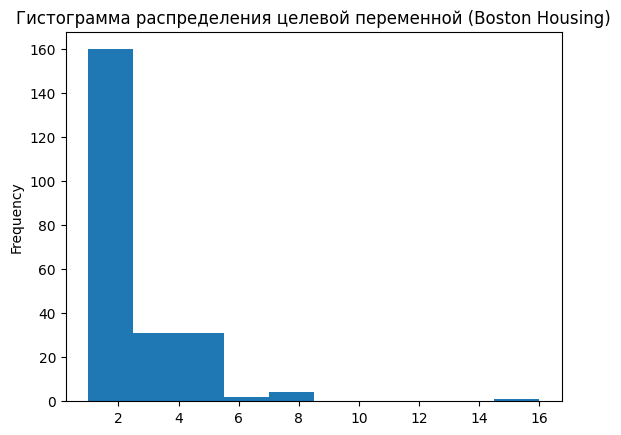

In [6]:
data_house['medv'].value_counts().plot(kind='hist')
plt.title('Гистограмма распределения целевой переменной (Boston Housing)')

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Iris)')

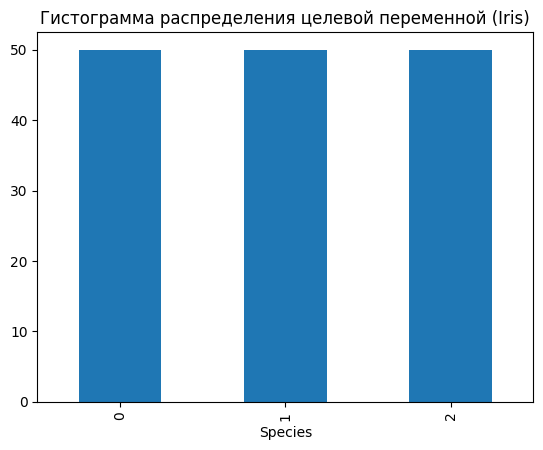

In [7]:
data_iris['Species'].value_counts().plot(kind='bar')
plt.title('Гистограмма распределения целевой переменной (Iris)')

2. Разделение данных на обучающую и тестовую выборки для data_house выборки

In [8]:
def data_split(data=data_house, target='medv'):
  y=data[target]
  X=data.drop(target, axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  # Признаки сильно отличаются по числам от сотен до долей десятых, поэтому лучше применить масштабирование признаков.
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train, y_train)
  X_test = scaler.transform(X_test)
  return X_train, X_test, y_train, y_test


In [9]:
# Для данных о домах
X_train_house, X_test_house, y_train_house, y_test_house = data_split()

3. Создание и обучение модели нейронной сети для данных data_house

In [10]:
model=Sequential()
model.add(Input(shape=(X_train_house.shape[1],)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(activation='linear', units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
study=model.fit(X_train_house, y_train_house, epochs=200, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 596.0776 - mean_squared_error: 596.0776 - val_loss: 554.1982 - val_mean_squared_error: 554.1982
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 612.1760 - mean_squared_error: 612.1760 - val_loss: 525.3536 - val_mean_squared_error: 525.3536
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 585.5867 - mean_squared_error: 585.5867 - val_loss: 495.9452 - val_mean_squared_error: 495.9452
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 511.7879 - mean_squared_error: 511.7879 - val_loss: 464.4061 - val_mean_squared_error: 464.4061
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 511.6110 - mean_squared_error: 511.6110 - val_loss: 430.7213 - val_mean_squared_error: 430.7213
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 457.5033 - mean_squared_error: 457.5033 - val_loss: 395.0056 - val_mean_squared_error: 395.0056
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 457.37

In [12]:
loss, mse=model.evaluate(X_test_house, y_test_house)
print("Mean Square Error:=",mse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1438 - mean_squared_error: 15.1438 
Mean Square Error:= 17.321760177612305


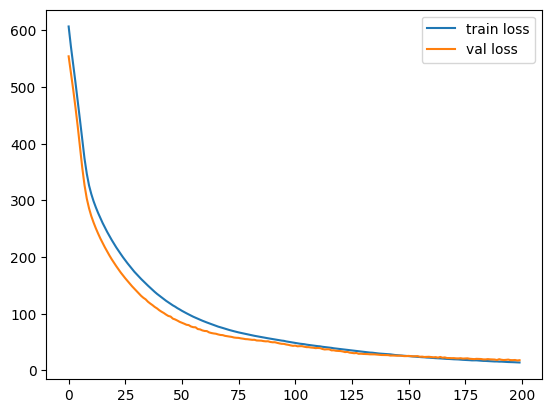

In [13]:
plt.plot(study.history['loss'], label='train loss')
plt.plot(study.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [14]:
y_pred_house=model.predict(X_test_house)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


# Вычисление метрик модели

In [15]:
def calculate_metrics(y_test=y_test_house, y_pred=y_pred_house):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')

In [16]:
calculate_metrics()

MSE: 17.321758010518447
MAE: 2.5234989097243865
RMSE: 4.1619416154624815
R2: 0.7675340438011775


Эти данные позволяют сделать следующие выводы:

RMSE cреднеквадратической ошибки (RMSE): 4.16

 RMSE  - это мера того, насколько хорошо модель предсказывает фактические значения.
 Чем меньше RMSE, тем лучше модель.


Коэффициент детерминации (R^2): 0.77

 R^2  - это мера того, насколько хорошо модель объясняет изменения в данных.
 R^2 принимает значения от 0 до 1. Чем ближе R^2 к 1, тем лучше модель объясняет данные.
 В данном случае R^2 равен 0.77, что означает, что модель объясняет 77% изменений в данных.
 Это хороший показатель, так как  R^2 больше 0.5, что свидетельствует о том, что модель достаточно хорошо объясняет данные.
 Однако в случае применения линйной регрессии R^2 получается 0.71. Следовательно данные хорошо обобщаются гиперплоскостью линейной регрессии. И для данных данных о домах лучше применить модель линейной регрессии.

Вывод:

 Модель достаточно неплохо предсказывает фактические значения, но есть пространство для улучшения.
 R^2 показывает, что модель хорошо объясняет изменения в данных.


Рекомендуемые действия:
  В данной задаче достатлчно будет применить линейную регрессию.
 Сравнить эту модель с другими моделями, чтобы оценить ее эффективность.
 Попробовать улучшить модель, например, добавив новые переменные или дополнительные свёрточные, maxpool слои .
 Проанализировать остатки модели, чтобы проверить,  есть ли какие-то систематические ошибки.

4. Создание и обучение модели k-ближайших соседей сети для данных data_iris

In [17]:
# Для данных об ирисах
X_train_iris, X_test_iris, y_train_iris, y_test_iris = data_split(data=data_iris, target='Species')

In [18]:
# Создание модели k-ближайших соседей
model_classification=KNeighborsRegressor(n_neighbors=3)
# Обучение модели
model_classification.fit(X_train_iris, y_train_iris)
# Предсказание на тестовых данных
y_pred_iris=model_classification.predict(X_test_iris)

In [19]:
# Вычисление метрик качества
accuracy=accuracy_score(y_test_iris, y_pred_iris)
precision=precision_score(y_test_iris, y_pred_iris, average='weighted')
recall=recall_score(y_test_iris, y_pred_iris, average='weighted')
f1=f1_score(y_test_iris, y_pred_iris, average='weighted')
confusion_mat=confusion_matrix(y_test_iris, y_pred_iris)
classification_rep=classification_report(y_test_iris, y_pred_iris)

print(f'Точность: {accuracy}')
print(f'Точность (Precision): {precision}')
print(f'Полнота (Recall): {recall}')
print(f'F1-мера:  {f1}')
print(f'Confusion matrix:\n{confusion_mat}\n\n')
print(f'Classification report:\n{classification_rep}')

Точность: 1.0
Точность (Precision): 1.0
Полнота (Recall): 1.0
F1-мера:  1.0
Confusion matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



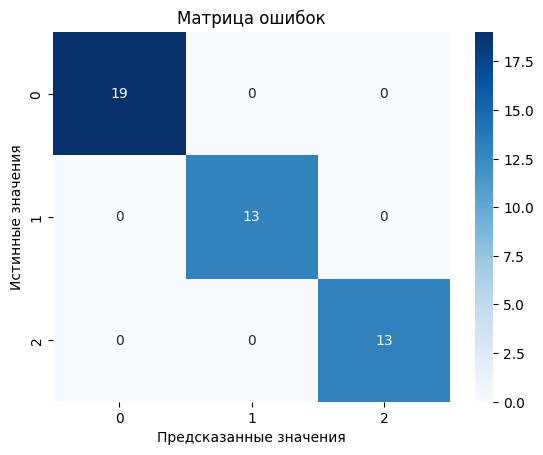

In [20]:
# Визуализация матрицы ошибок
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

Эти данные показывают идеальную производительность модели.

Объяснение:

 Точность (Precision)  = 1.00 означает, что все предсказанные положительные случаи были действительно положительными. Другими словами, модель не сделала ни одной ложноположительной ошибки.
 Полнота (Recall) = 1.00 означает, что модель нашла все положительные случаи. Другими словами, модель не пропустила ни одного положительного случая.
 F1-мера = 1.00  является гармоническим средним точности и полноты. Поскольку оба показателя равны 1.00, F1-мера также равна 1.00, что подтверждает идеальную производительность модели.

В целом, данные указывают на то, что модель прекрасно справляется с задачей классификации и не делает ошибок.

Однако, важно учитывать контекст:

 Размер выборки: Идеальные показатели могут быть достигнуты на очень маленькой выборке.
 Сложность задачи: Простые задачи классификации могут быть легко решены даже простыми моделями.
 Сбалансированность данных: Идеальные показатели могут быть достигнуты, если данные сильно сбалансированы (т.е. количество положительных и отрицательных примеров одинаково).

Важно проверить эти показатели на разных выборках данных (например, на тестовой выборке), чтобы убедиться, что модель действительно работает хорошо и не переобучается.

**Интерпретация confusion_matrix - в тестовой выборке все 19 объектов класса 0 были правильно отнесены к классу 0, все 13 объектов класса 1 были правильно отнесены к классу 1, все 13 объектов класса 2 были правильно отнесены к классу 2, неправильно классифицированных объектов не было.**